In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns
sns.set_theme()
from utilities import *


In [2]:
#Load the configurations into dataframes

eil51 = pd.read_csv('configurations/eil51.tsp.txt', delimiter=' ', index_col= 0, header = None)
eil51_opt = pd.read_csv('configurations/eil51.opt.tour.txt', delimiter=' ', index_col= False, header = None)
a280 = pd.read_csv('configurations/a280.tsp.txt', delimiter=' ', index_col= 0, header = None)
a280_opt = pd.read_csv('configurations/a280.opt.tour.txt', delimiter=' ', index_col= None, header = None)
pcb442 = pd.read_csv('configurations/pcb442.tsp.txt', delimiter=' ', index_col= 0, header = None)
pcb442_opt = pd.read_csv('configurations/pcb442.opt.tour.txt', delimiter=' ', index_col= None, header = None)

In [3]:
#Create the graphs

G_eil51,pos_eil51= nodes_generator(eil51)
G_a280,pos_a280= nodes_generator(a280)
G_pcb442,pos_pcb442= nodes_generator(pcb442)

In [4]:
g = edges_generator(G_eil51,eil51_opt)

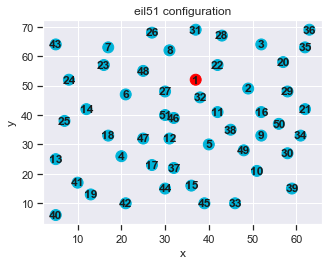

In [5]:
graph_plotter(G_eil51,pos_eil51,'eil51',5)

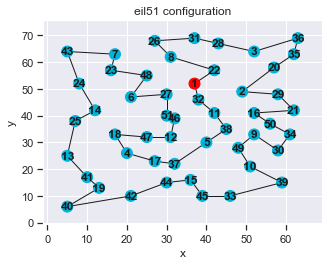

In [5]:
graph_plotter(g,pos_eil51,'eil51',5)


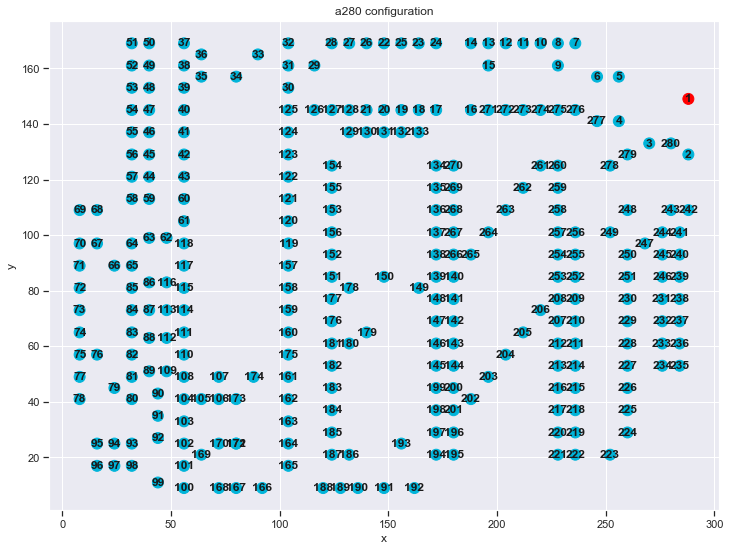

In [19]:
graph_plotter(G_a280,pos_a280,'a280',size=12)

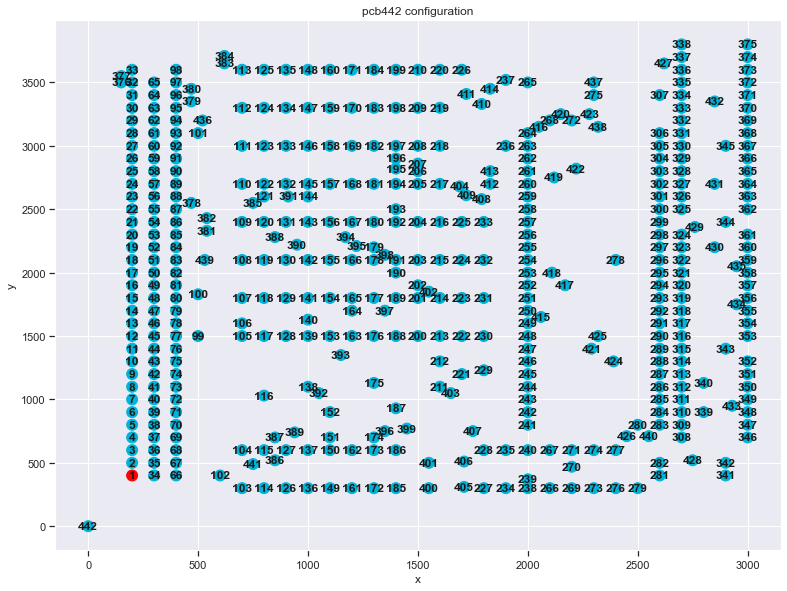

In [9]:
graph_plotter(G_pcb442,pos_pcb442,'pcb442',size=13)

In [97]:
#Distance matrix that finds the euclidean distance between each node

def distance(df):
    dist = np.zeros((len(df),len(df)))
    x = df[1]
    y = df[2]
    for i in range(0,len(df[1])):
        diff_x = x -x[i+1]
        diff_y = y-y[i+1]

        length = np.asarray((diff_x**2 + diff_y**2)**0.5)
        dist[i]= length
    ddf = pd.DataFrame(data =dist)
    return ddf


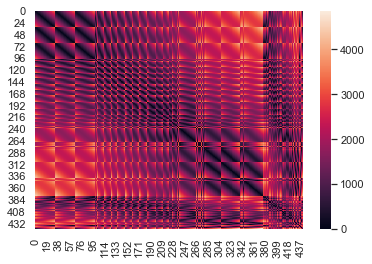

In [98]:
d_51 = distance(eil51)
d_280 = distance(a280)
d_pcb442 = distance(pcb442)
sns.heatmap(d_pcb442, annot=False)
plt.show()


In [99]:
d_280

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,0.000000,20.000000,24.083189,32.984845,32.984845,42.755117,55.713553,63.245553,61.188234,70.880181,...,92.086915,84.095184,76.105190,68.117545,60.133186,52.153619,42.755117,43.266615,34.409301,17.888544
1,20.000000,0.000000,18.439089,34.176015,42.520583,50.477718,65.604878,72.111026,68.000000,78.892332,...,93.380940,85.510233,77.665951,69.856997,62.096699,54.405882,43.680659,36.221541,28.000000,8.944272
2,24.083189,18.439089,0.000000,16.124515,27.784888,33.941125,49.517674,55.317267,50.477718,61.611687,...,74.966659,67.082039,59.228372,51.419841,43.680659,36.055513,25.298221,19.697716,10.770330,10.000000
3,32.984845,34.176015,16.124515,0.000000,16.000000,18.867962,34.409301,39.597980,34.409301,45.607017,...,60.133186,52.153619,44.181444,36.221541,28.284271,20.396078,10.000000,16.492423,12.649111,25.298221
4,32.984845,42.520583,27.784888,16.000000,0.000000,10.000000,23.323808,30.463092,28.284271,37.947332,...,61.188234,53.366656,45.607017,37.947332,30.463092,23.323808,18.867962,32.249031,28.284271,33.941125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,52.153619,54.405882,36.055513,20.396078,23.323808,15.620499,24.000000,25.298221,17.888544,28.844410,...,40.000000,32.000000,24.000000,16.000000,8.000000,0.000000,10.770330,25.612497,28.844410,45.607017
276,42.755117,43.680659,25.298221,10.000000,18.867962,16.000000,29.732137,33.286634,26.907248,38.209946,...,50.159745,42.190046,34.234486,26.305893,18.439089,10.770330,0.000000,17.088007,18.439089,34.928498
277,43.266615,36.221541,19.697716,16.492423,32.249031,32.557641,46.818800,50.119856,43.266615,54.405882,...,59.464275,52.000000,44.721360,37.735925,31.240999,25.612497,17.088007,0.000000,8.944272,29.120440
278,34.409301,28.000000,10.770330,12.649111,28.284271,31.304952,46.647615,51.224994,45.254834,56.568542,...,65.969690,58.240879,50.596443,43.081318,35.777088,28.844410,18.439089,8.944272,0.000000,20.396078
